In [8]:
import json, base64, io, numpy as np, os
from PIL import Image
import matplotlib.pyplot as plt
import requests, urllib
print(os.getcwd())

c:\Users\James\Desktop\projects\cmu\CMU_10708_google_scraper


In [13]:
def clip_prefix(s):
  q = s.index("base64")
  return s[q + 6:]

def pull(s):
  if s.startswith("data:image"):
    path = clip_prefix(s)
    b64 = base64.b64decode(path)
    image = Image.open(io.BytesIO(b64))
    return image
  else:
    r = requests.get(s)
    if r.status_code == 200:
      return Image.open(io.BytesIO(r.content))
    return None
    

In [14]:
folder_path = "json_files/straw"
imgs = []
for jsonfile in os.listdir(folder_path):
  with open(os.path.join(folder_path, jsonfile), "r") as f:
    obj = json.load(f)
    for img_path in obj:
      imgs.append(pull(img_path))

C:\Users\James\AppData\Local\Temp\ipykernel_36416\1164081356.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


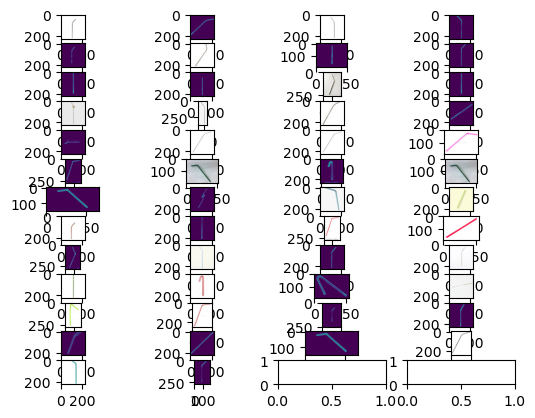

In [19]:
c = 4
rows = (len(imgs) + c - 1) // c
f, axarr = plt.subplots((len(imgs) + c - 1) // c, c)
if rows == 1:
  axarr = [axarr]
for i, v in enumerate(imgs):
  if v is not None:
    v = np.array(v)
    axarr[i // c][i % c].imshow(v)
  else:
    axarr[i // c][i % c].text(0, 0, "null")

In [20]:
output_folder = "output_folder"

for i, v in enumerate(imgs):
  if v.mode in ["RGBA", "P"]:
    v = v.convert("RGB")
  v.save(os.path.join(output_folder, f"{i}.png"))